### Homework 3.3 - Please Help The Cat

A poor cat is trapped on canvas by an evil witch. Please help releasing the cat by breaking the curse using Discrete Fourier Transform learned in our magic class.

You may find the image at `images/poor-cat-trapped-on-canvas.jpg`. Note that the image has 3 color channels (RGB).

Please remember that the examples shown in class uses the book of spells from the ancient library. Try searching the newer spells on the internet.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

<img src="images/poor-cat-trapped-on-canvas.jpg" alt="A poor cat trapped on canvas" width="400">

In [38]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab as py
from scipy import misc, fftpack
%matplotlib inline

# Please Help The Cat
<b>We will apply low pass filter to the image</b>
<br>
<b>Steps</b>:
<br>
> 1st - We created a gray image from original image
<br>
> 2nd - Then we Fast Fourier Fourier Transform the gray image and we shifted it
<br>
> 3rd - We then created a Mask of the image (code from in class)
<br>
> 4th - Created a filtered_image by multiplying shifted image with the mask
<br>
> 5th - Shifted the filtered_image
<br>
> 6th - Inverse Fast Fourier Transform back, obtaining filtered image
<br>

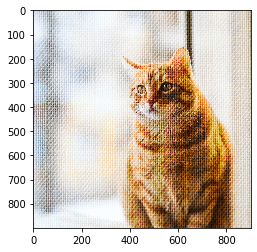

In [39]:
image = mpimg.imread('images/poor-cat-trapped-on-canvas.jpg')
py.imshow(image)
py.show()

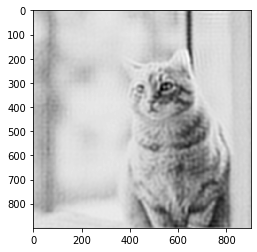

In [40]:
# LOW PASS FILTER


n = 901
# Make gray image
grayim = image[:,:,0]



# Fast fourier gray image then shift the image
D1 = fftpack.fft2(grayim)/n
D2 = fftpack.fftshift(D1)

abs_image = np.abs(D2)


# Making "mask" of image
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I
R = 50
X = x[:, np.newaxis]
Y = y[np.newaxis, :]

# Mask of the image
M = X**2 + Y**2 < R**2

# Plot the mask
DD1 = fftpack.fft2(M)/n
DD2 = fftpack.fftshift(DD1)
D3 = fftpack.fft2(DD1)/n
abs_image = np.abs(D3)



# Then shifted filtered_image(shifted_image*MASK)
# Then inverse F.T.
# Then plot
f_filtered_shifted = np.fft.fftshift(D2*M)
inv_img = np.fft.ifft2(f_filtered_shifted) # inverse F.T.
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

py.imshow(filtered_img, cmap="gray")
py.show()